# Modelo Base: Regresión Logística
Este notebook entrena un modelo base de clasificación binaria usando regresión logística sobre el dataset de readmisión hospitalaria.

In [2]:
# Cargar librerías
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Detectar si es Google Colab
IN_COLAB = 'google.colab' in str(get_ipython())
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    BASE_PATH = '/content/drive/MyDrive/Hospital_Readmission'
else:
    BASE_PATH = '.'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Define BASE_PATH como el directorio actual
os.chdir(BASE_PATH)
print(f"Directorio actual: {os.getcwd()}")

Directorio actual: /content/drive/MyDrive/Hospital_Readmission


In [4]:
# Cargar datos
df = pd.read_csv(os.path.join(BASE_PATH, './data/hospital_readmission_clean.csv'))
df.head()

/tmp/ipython-input-4-3690996837.py:2: DtypeWarning: Columns (1506,1507,1508,1509,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543,1544,1545,1546,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560,1561,1562,1563,1564,1565,1566,1567,1568,1569,1570,1571,1572,1573,1574,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1603,1604,1605,1606,1607,1608,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686,1687,1688,1689,1690,1691,1692,1693

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Steady,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes
0,6,25,1,1,41,0,1,0,0,0,...,False,False,True,False,False,False,False,False,True,False
1,1,1,7,3,59,0,18,0,0,0,...,False,True,True,False,False,False,False,False,False,True
2,1,1,7,2,11,5,13,2,0,1,...,False,False,True,False,False,False,False,False,True,True
3,1,1,7,2,44,1,16,0,0,0,...,False,True,True,False,False,False,False,False,False,True
4,1,1,7,1,51,0,8,0,0,0,...,True,False,True,False,False,False,False,False,False,True


In [5]:
# Codificación LabelEncoder para variables categóricas
df_encoded = df.copy()
label_encoders = {}
for col in df_encoded.select_dtypes(include='object').columns:
    # Convert column to string type to handle mixed types
    df_encoded[col] = df_encoded[col].astype(str)
    # Fill NaN values with a placeholder string
    df_encoded[col] = df_encoded[col].fillna('Missing')
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

X = df_encoded.drop('readmitted', axis=1)
y = df_encoded['readmitted']

In [6]:
# División en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [7]:
# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [8]:
# Evaluación del modelo
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       886
           1       0.29      0.02      0.03       112

    accuracy                           0.88       998
   macro avg       0.59      0.51      0.49       998
weighted avg       0.82      0.88      0.84       998

ROC AUC: 0.5848818929377622


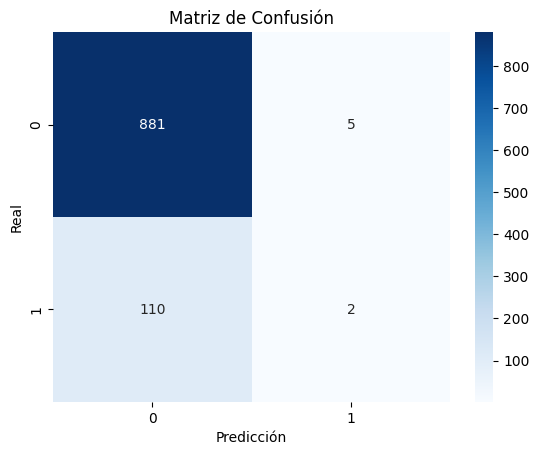

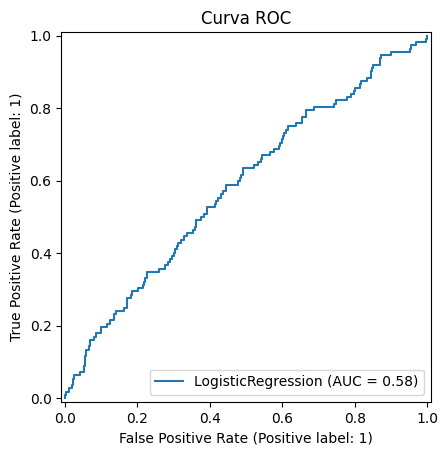

In [9]:
# Matriz de confusión y curva ROC
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Curva ROC")
plt.show()

In [10]:
from sklearn.metrics import accuracy_score

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Accuracy train:", accuracy_score(y_train, y_train_pred))
print("Accuracy test :", accuracy_score(y_test, y_test_pred))

Accuracy train: 0.8930092708594337
Accuracy test : 0.8847695390781564


In [ ]:
# Solo variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Mapa de correlación entre variables")
plt.show()

In [ ]:
# Ranking por coeficiente de regresión logística
import numpy as np
importance = model.coef_[0]
feature_importance = pd.Series(np.abs(importance), index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Ranking de variables más influyentes:")
print(feature_importance)

# Gráfico
feature_importance.head(10).plot(kind='barh')
plt.title("Top 10 variables más influyentes")
plt.xlabel("Importancia (|coef|)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Accuracy promedio (5-fold CV):", cv_scores.mean())
print("Accuracies individuales:", cv_scores)